*Credits: Applied Data Analysis (ADA) course at EPFL (https://dlab.epfl.ch/teaching/fall2020/cs401/)*

## Applied Machine Learning

Welcome to our last tutorial of the course, congratulations for making it until here! In this tutorial, we will go through the main concepts learned during the course using a real-world use case.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from itertools import combinations 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sn

%matplotlib inline

### All you need is love… And a pet!

<img src="img/dataset-cover.jpg" width="920">

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

### Data processing

First things first! Let's load the data into memory using Pandas:

In [2]:
original_data = pd.read_csv('./data/aac_intakes_outcomes.csv')

#just for me:

original_data = original_data[['outcome_type','sex_upon_outcome', 'age_upon_outcome_(years)','animal_type',
                               'intake_condition', 'intake_type', 'sex_upon_intake', 'age_upon_intake_(years)',
                               'intake_year', 'intake_number', 'time_in_shelter_days']]

original_data.head(20)

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days
0,Return to Owner,Neutered Male,10.0,Dog,Normal,Stray,Neutered Male,10.0,2017,1.0,0.588194
1,Return to Owner,Neutered Male,7.0,Dog,Normal,Public Assist,Neutered Male,7.0,2014,2.0,1.259722
2,Return to Owner,Neutered Male,6.0,Dog,Normal,Public Assist,Neutered Male,6.0,2014,3.0,1.113889
3,Transfer,Neutered Male,10.0,Dog,Normal,Owner Surrender,Neutered Male,10.0,2014,1.0,4.970139
4,Return to Owner,Neutered Male,16.0,Dog,Injured,Public Assist,Neutered Male,16.0,2013,1.0,0.119444
5,Return to Owner,Spayed Female,15.0,Dog,Aged,Stray,Spayed Female,15.0,2013,1.0,0.870833
6,Return to Owner,Intact Female,15.0,Dog,Normal,Stray,Intact Female,15.0,2014,1.0,0.178472
7,Return to Owner,Neutered Male,15.0,Dog,Normal,Stray,Neutered Male,15.0,2014,1.0,0.213194
8,Return to Owner,Neutered Male,15.0,Dog,Normal,Public Assist,Neutered Male,15.0,2014,1.0,6.258333
9,Return to Owner,Spayed Female,18.0,Dog,Normal,Stray,Spayed Female,18.0,2015,1.0,0.054167


Let's check if there are any missing values in the DataFrame. [This website](https://datatofish.com/check-nan-pandas-dataframe/) gives a great overview on the possibilities that you have to check this. Try to print how many values of each column are missing. `isna`. `isnull`

In [3]:
len(original_data)

79672

In [4]:
# add your code here
original_data.isnull().sum(axis=0)

outcome_type                10
sex_upon_outcome             1
age_upon_outcome_(years)     0
animal_type                  0
intake_condition             0
intake_type                  0
sex_upon_intake              1
age_upon_intake_(years)      0
intake_year                  0
intake_number                0
time_in_shelter_days         0
dtype: int64

Since the number of missing values is very small compared to the data size, and since most of the missing values correspond to the target variable `outcome_type`, we have decided to just drop the instances where there exists any null value. *Hint*: to do this, you may want to use pandas' `dropna`.

In [5]:
print('The length of the data with all rows is : {}'.format(len(original_data)))
original_data = original_data.dropna()
print('The length of the data without the rows with nan value is: {}'.format(len(original_data)))

The length of the data with all rows is : 79672
The length of the data without the rows with nan value is: 79661


How many different values does the column _outcome\_type_ have? Print them:

In [6]:
(original_data.outcome_type.unique()!=0).sum() 

9

In [7]:
# add your code here
set(original_data.outcome_type)

{'Adoption',
 'Died',
 'Disposal',
 'Euthanasia',
 'Missing',
 'Relocate',
 'Return to Owner',
 'Rto-Adopt',
 'Transfer'}

In this task, we will just focus on whether the animal was adopted or not. Create the column _adopted_, that will have a value 1 if the value for _outcome\_type_ is 'Adoption', and 0 otherwise. `apply`, `lambda`


In [8]:
original_data['adopted'] = (original_data['outcome_type']=='Adoption')
original_data.adopted = original_data.adopted.astype(int)
original_data.head(5)

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,adopted
0,Return to Owner,Neutered Male,10.0,Dog,Normal,Stray,Neutered Male,10.0,2017,1.0,0.588194,0
1,Return to Owner,Neutered Male,7.0,Dog,Normal,Public Assist,Neutered Male,7.0,2014,2.0,1.259722,0
2,Return to Owner,Neutered Male,6.0,Dog,Normal,Public Assist,Neutered Male,6.0,2014,3.0,1.113889,0
3,Transfer,Neutered Male,10.0,Dog,Normal,Owner Surrender,Neutered Male,10.0,2014,1.0,4.970139,0
4,Return to Owner,Neutered Male,16.0,Dog,Injured,Public Assist,Neutered Male,16.0,2013,1.0,0.119444,0


In [9]:
data = original_data.copy()
data['adopted'] = data.outcome_type.apply(lambda x: 1 if x=='Adoption' else 0)

In [10]:
data.head(5)

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,adopted
0,Return to Owner,Neutered Male,10.0,Dog,Normal,Stray,Neutered Male,10.0,2017,1.0,0.588194,0
1,Return to Owner,Neutered Male,7.0,Dog,Normal,Public Assist,Neutered Male,7.0,2014,2.0,1.259722,0
2,Return to Owner,Neutered Male,6.0,Dog,Normal,Public Assist,Neutered Male,6.0,2014,3.0,1.113889,0
3,Transfer,Neutered Male,10.0,Dog,Normal,Owner Surrender,Neutered Male,10.0,2014,1.0,4.970139,0
4,Return to Owner,Neutered Male,16.0,Dog,Injured,Public Assist,Neutered Male,16.0,2013,1.0,0.119444,0


Now, drop the column _outcome\_type_, since we do not need it anymore. `drop`

In [11]:
data = data.drop(labels=['outcome_type'],axis=1)
data.head()

,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,adopted
0,Neutered Male,10.0,Dog,Normal,Stray,Neutered Male,10.0,2017,1.0,0.588194,0
1,Neutered Male,7.0,Dog,Normal,Public Assist,Neutered Male,7.0,2014,2.0,1.259722,0
2,Neutered Male,6.0,Dog,Normal,Public Assist,Neutered Male,6.0,2014,3.0,1.113889,0
3,Neutered Male,10.0,Dog,Normal,Owner Surrender,Neutered Male,10.0,2014,1.0,4.970139,0
4,Neutered Male,16.0,Dog,Injured,Public Assist,Neutered Male,16.0,2013,1.0,0.119444,0


Select the data features (all but _adopted_) and the data label (_adopted_) for the task. After this, split the data into a training set (80%) and a test set (20%). You may use sklearn's function `train_test_split`. Use a random_state=42. You can further check the documentation in: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [12]:
data_features = data.drop(columns=['adopted'])
data_label = data['adopted']

train_features, test_features, train_label, test_label = train_test_split(data_features,data_label,test_size=0.2,train_size=0.8,random_state=42, stratify = data_label)

print('Length of the train dataset : {}'.format(len(train_features)))
print('Length of the test dataset : {}'.format(len(test_label)))

Length of the train dataset : 63728
Length of the test dataset : 15933


In [13]:
#is it balanced?
print(test_label.sum()/len(test_label))
print(train_label.sum()/len(train_label))

0.4217033829159606
0.42171416018076824


The dataset contains categorial features. We need to convert this to a suitable numerical representation. We will use pandas' `get_dummies` function to use a dummy-variable encoding.

In [14]:
train_categorical = pd.get_dummies(train_features)
train_categorical.head()

,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
19735,0.246575,0.246575,2014,1.0,5.172917,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
55156,0.164384,0.164384,2016,1.0,1.149306,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
59136,0.657534,0.657534,2016,6.0,1.184722,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
12431,2.000000,2.000000,2014,1.0,28.962500,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
54013,2.000000,2.000000,2016,1.0,8.891667,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


We will do the same with the test set. However, we have to take into account that the features in the test set must be matched with the ones in the training set.

In [15]:
# Make sure we use only the features available in the test set
test_categorical = pd.get_dummies(test_features)
test_categorical.head()

,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
41821,6.000000,6.000000,2015,1.0,5.210417,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
10631,0.164384,0.164384,2014,1.0,0.725000,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
8022,1.000000,1.000000,2013,1.0,28.170833,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
39425,0.821918,0.739726,2015,1.0,5.845139,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
41197,1.000000,1.000000,2015,1.0,0.907639,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


Let's normalize the values of each feature in the data to have mean 0 and variance 1. For this, we will use sklearn's `StandardScaler` function. Check out more in its documentation https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Declare an instance of the scaler and fit it with the training features.

In [16]:
scaler = StandardScaler()
scaler.fit(train_categorical)

StandardScaler()

Now, normalize the training features. *Hint:* use `.transform()`

In [17]:
scaled_features = scaler.transform(train_categorical)

# The output of the .transform() function is a numpy matrix. We transform it back to a DataFrame
train_features_std = pd.DataFrame(scaled_features, index=train_categorical.index, columns=train_categorical.columns)
train_features_std.head()

,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
19735,-0.652754,-0.642278,-1.100308,-0.278255,-0.280006,-0.364281,-0.373150,1.350860,-0.688173,-0.305253,...,-0.054972,-0.481473,-0.258648,0.650660,-0.21333,-0.653103,-0.680905,2.295911,-0.402686,-0.305253
55156,-0.681066,-0.670661,0.432245,-0.278255,-0.376618,-0.364281,2.679887,-0.740269,-0.688173,-0.305253,...,-0.054972,-0.481473,-0.258648,0.650660,-0.21333,-0.653103,1.468633,-0.435557,-0.402686,-0.305253
59136,-0.511194,-0.500365,0.432245,10.715316,-0.375767,-0.364281,-0.373150,1.350860,-0.688173,-0.305253,...,-0.054972,-0.481473,-0.258648,0.650660,-0.21333,-0.653103,1.468633,-0.435557,-0.402686,-0.305253
12431,-0.048764,-0.036781,-1.100308,-0.278255,0.291213,-0.364281,-0.373150,-0.740269,1.453123,-0.305253,...,-0.054972,-0.481473,-0.258648,0.650660,-0.21333,-0.653103,-0.680905,-0.435557,2.483323,-0.305253
54013,-0.048764,-0.036781,0.432245,-0.278255,-0.190714,-0.364281,-0.373150,1.350860,-0.688173,-0.305253,...,-0.054972,2.076961,-0.258648,-1.536902,-0.21333,-0.653103,-0.680905,2.295911,-0.402686,-0.305253


We will also normalize the test features with the same scaler (mean and variance are extracted from the training columns). We do this because we assume that the training data is representative enough of our sample, and we should not look at the distribution of the test set and instead assume that it will be similar to the training set.

In [18]:
scaled_features = scaler.transform(test_categorical)

# The output of the .transform() function is a numpy matrix. We transform it back to a DataFrame
test_features_std = pd.DataFrame(scaled_features, index=test_categorical.index, columns=test_categorical.columns)
test_features_std.head()

,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Female,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown
41821,1.329087,1.344510,-0.334032,-0.278255,-0.279105,-0.364281,-0.373150,1.350860,-0.688173,-0.305253,...,-0.054972,-0.481473,-0.258648,0.65066,-0.21333,-0.653103,1.468633,-0.435557,-0.402686,-0.305253
10631,-0.681066,-0.670661,-1.100308,-0.278255,-0.386806,2.745134,-0.373150,-0.740269,-0.688173,-0.305253,...,-0.054972,-0.481473,-0.258648,0.65066,-0.21333,1.531151,-0.680905,-0.435557,-0.402686,-0.305253
8022,-0.393227,-0.382104,-1.866585,-0.278255,0.272204,-0.364281,-0.373150,1.350860,-0.688173,-0.305253,...,-0.054972,-0.481473,-0.258648,0.65066,-0.21333,-0.653103,1.468633,-0.435557,-0.402686,-0.305253
39425,-0.454570,-0.471982,-0.334032,-0.278255,-0.263865,-0.364281,2.679887,-0.740269,-0.688173,-0.305253,...,-0.054972,-0.481473,-0.258648,0.65066,-0.21333,-0.653103,1.468633,-0.435557,-0.402686,-0.305253
41197,-0.393227,-0.382104,-0.334032,-0.278255,-0.382421,2.745134,-0.373150,-0.740269,-0.688173,-0.305253,...,-0.054972,-0.481473,-0.258648,0.65066,-0.21333,1.531151,-0.680905,-0.435557,-0.402686,-0.305253


### Training and evaluation phases

Since this is a classification task, we will make use of Logistic Regression.

Declare and train a Logistic Regression Classifier on your training set. For this, you can use the constructor `LogisticRegression` from sklearn. Check out further information in https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Choose max_iter=10000

In [19]:
logistic = LogisticRegression(max_iter=10000)
logistic.fit(train_features_std,train_label) # train the model

LogisticRegression(max_iter=10000)

Print the predicted probabilities obtained for the test set. You can use `.predict_proba()` for this:

In [20]:
prediction_proba = logistic.predict_proba(test_features_std)
prediction_proba

array([[4.65965070e-01, 5.34034930e-01],
       [9.37443126e-01, 6.25568745e-02],
       [2.80973076e-01, 7.19026924e-01],
       ...,
       [3.99673934e-01, 6.00326066e-01],
       [9.99305538e-01, 6.94462107e-04],
       [9.45816451e-01, 5.41835493e-02]])

Logistic Regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. 

The function below computes a confusion matrix given the true labels, the prediction probabilities, and the chosen decision threshold. Complete the function by completing the formulas to calculate the true positives, true negatives, false positives, and false negatives.

After this, we will print the confusion matrix for a decision threshold of 0.5.

In [21]:
def getProbabilities(array, threshold):
    
    return np.array(array[:,1]>threshold, dtype = int)

getProbabilities(prediction_proba, 0.5)

array([1, 0, 1, ..., 1, 0, 0])

In [22]:
def compute_confusion_matrix(true_label, prediction_proba, decision_threshold): 
    
    # Get the predicted label based on the threshold chosen
    predict_label = (prediction_proba[:,1]>decision_threshold).astype(int)   
                                                                                                                       
    TP = np.sum(np.logical_and(predict_label==1, true_label==1))
    TN = np.sum(np.logical_and(predict_label==0, true_label==0))
    FP = np.sum(np.logical_and(predict_label==1, true_label==0))
    FN = np.sum(np.logical_and(predict_label==0, true_label==1))
    
    confusion_matrix = np.asarray([[TP, FP],
                                    [FN, TN]])
    return confusion_matrix


confusion_matrix_05 = compute_confusion_matrix(test_label, prediction_proba, 0.5)
confusion_matrix_05

array([[5491, 1647],
       [1228, 7567]], dtype=int64)

In [23]:
# accuracy = (TP+TN)/total
total = confusion_matrix_05.sum()
correct = (confusion_matrix_05[0][0]+confusion_matrix_05[1][1])
accuracy = correct/total
accuracy

0.8195568944957008

In [24]:
logistic.predict(test_features_std)
test_label
accuracy = sum(logistic.predict(test_features_std) == test_label)/len(test_label)
accuracy

0.8195568944957008

Let's plot the confusion matrix (code complete):

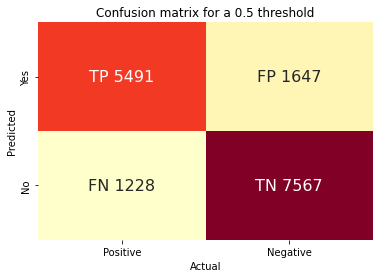

In [25]:
def plot_confusion_matrix(confusion_matrix):
    [[TP, FP],[FN, TN]] = confusion_matrix
    label = np.asarray([['TP {}'.format(TP), 'FP {}'.format(FP)],
                        ['FN {}'.format(FN), 'TN {}'.format(TN)]])
    
    df_cm = pd.DataFrame(confusion_matrix, index=['Yes', 'No'], columns=['Positive', 'Negative']) 
    
    return sn.heatmap(df_cm, cmap='YlOrRd', annot=label, annot_kws={"size": 16}, cbar=False, fmt='')

plt.figure(figsize = (6,4)) 
ax = plot_confusion_matrix(confusion_matrix_05)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion matrix for a 0.5 threshold')
plt.show()

The function below computes the accuracy, precision, recall, and F1-score with respect to the positive and the negative class. 

After this, we will print all the scores for a decision threshold of 0.5.

In [26]:
def compute_all_score(confusion_matrix, t=0.5):
    [[TP, FP],[FN, TN]] = confusion_matrix.astype(float)
    
    accuracy =  (TP+TN)/confusion_matrix.sum()
    
    precision_positive = TP/(FP+TP) if (FP+TP)!=0 else np.nan
    precision_negative = TN/(FN+TN) if (FN+TN)!=0 else np.nan
    
    recall_positive = TP/(TP+FN) if (TP+FN) !=0 else np.nan
    recall_negative = TN/(TN+FN) if (TN+FN) !=0 else np.nan

    F1_score_positive = 2*precision_positive*recall_positive/(precision_positive+recall_positive)
    F1_score_negative = 2*precision_negative*recall_negative/(precision_negative+recall_negative)
    
    return [t, accuracy, precision_positive, recall_positive, F1_score_positive, precision_negative, recall_negative, F1_score_negative]


[t, accuracy, precision_positive, recall_positive, F1_score_positive, 
    precision_negative, recall_negative, F1_score_negative] = compute_all_score(confusion_matrix_05)

print("The accuracy of this model is {0:1.3f}".format(accuracy))
print("For the positive case, the precision is {0:1.3f}, the recall is {1:1.3f} and the F1 score is {2:1.3f}"\
      .format(precision_positive, recall_positive, F1_score_positive))
print("For the negative case, the precision is {0:1.3f}, the recall is {1:1.3f} and the F1 score is {2:1.3f}"\
      .format(precision_negative, recall_negative, F1_score_negative))

The accuracy of this model is 0.820
For the positive case, the precision is 0.769, the recall is 0.817 and the F1 score is 0.793
For the negative case, the precision is 0.860, the recall is 0.860 and the F1 score is 0.860


### Further visual analysis (code complete)

We will vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. Use the function linspace from numpy to get 100 values ranging from 0 to 1

In [27]:
threshold = np.linspace(0,1,100)

The code below computes all the metrics for each of the threshold levels, and stores them into a pandas DataFrame

In [28]:
columns_score_name = ['Threshold', 'Accuracy', 'Precision P', 'Recall P', 'F1 score P', \
                                              'Precision N', 'Recall N', 'F1 score N']
threshold_score = pd.concat([pd.DataFrame([compute_all_score(compute_confusion_matrix(test_label, prediction_proba, t ),t)]\
                                             , columns=columns_score_name) for t in threshold], ignore_index=True)

threshold_score.head()

,Threshold,Accuracy,Precision P,Recall P,F1 score P,Precision N,Recall N,F1 score N
0,0.000000,0.421703,0.421703,1.000000,0.593237,NaN,NaN,NaN
1,0.010101,0.489738,0.452482,0.999851,0.623018,0.999079,0.999079,0.999079
2,0.020202,0.525388,0.470473,0.999554,0.639802,0.998191,0.998191,0.998191
3,0.030303,0.537940,0.477129,0.998214,0.645649,0.993603,0.993603,0.993603
4,0.040404,0.556392,0.487303,0.996726,0.654579,0.989954,0.989954,0.989954


Plot the accuracy as a function of the threshold. Put a title and name the axis.

Tip: you can use the threshold column as the index of the dataframe (not mandatory)

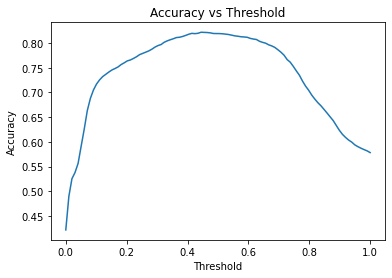

In [29]:
plt.plot(threshold_score['Threshold'],threshold_score['Accuracy'])
plt.title('Accuracy vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show()

We will now plot the rest of the metrics as a function of the threshold

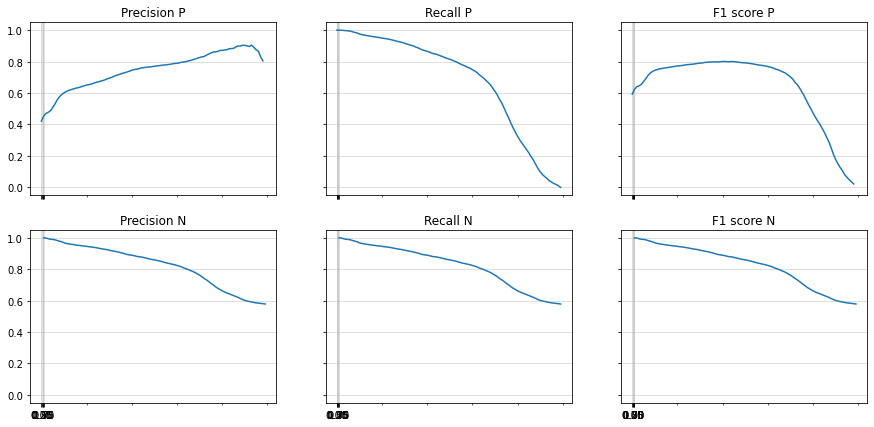

In [30]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,7))

col_plot = ['Precision P', 'Recall P', 'F1 score P', 'Precision N', 'Recall N', 'F1 score N']

major_ticks = np.linspace(0,1,5)

for axe, col in zip(axs.flat, col_plot):
    threshold_score[col].plot(ax=axe, grid = True)
    axe.set_title(col)
    axe.set_xticks(major_ticks)    
    axe.grid(which='major', alpha=0.5)

What do you observe? What do you think a good value for the threshold might be?

### Feature analysis

Based on the Logistic Regression model trained, obtain the coefficients associated to each of the features. Check out the `coef_` attribute.

**Important**: the array must have 1 dimension only.

In [31]:
logistic_coefficients = logistic.coef_[0]
logistic_coefficients

array([ 1.52400608, -1.91198267,  0.199842  ,  0.0576634 ,  0.78561898,
       -0.68338908, -0.78244534,  0.63746062,  0.64971896, -0.47343296,
        0.21858955, -0.02845615, -0.05423236,  0.11643209,  0.04399518,
       -0.05264022, -0.06277796,  0.07577703, -0.01347958, -0.01979629,
        0.01561729, -0.04869761, -0.04258587,  0.42004472, -0.36428853,
        0.10972666, -0.60619939,  0.35764778,  0.33421726, -0.29206803,
       -0.23115896, -0.47343296])

We will create an array with the name of the features and the coefficient associated to it (code complete):

In [32]:
tmp = []
for name, value in zip(train_features_std.columns, logistic_coefficients):
    tmp.append({"name": name, "value": value})
    
features_coef = pd.DataFrame(tmp)
features_coef.head()

,name,value
0,age_upon_outcome_(years),1.524006
1,age_upon_intake_(years),-1.911983
2,intake_year,0.199842
3,intake_number,0.057663
4,time_in_shelter_days,0.785619


Sort this DataFrame in ascending order by value. `sort_values`

In [33]:
features_coef = features_coef.sort_values(by=['value'])
features_coef.head()

,name,value
1,age_upon_intake_(years),-1.911983
6,sex_upon_outcome_Intact Male,-0.782445
5,sex_upon_outcome_Intact Female,-0.683389
26,intake_type_Wildlife,-0.606199
31,sex_upon_intake_Unknown,-0.473433


Let's plot in a bar chart the coefficients of the logistic regression sorted by their contribution to the prediction.

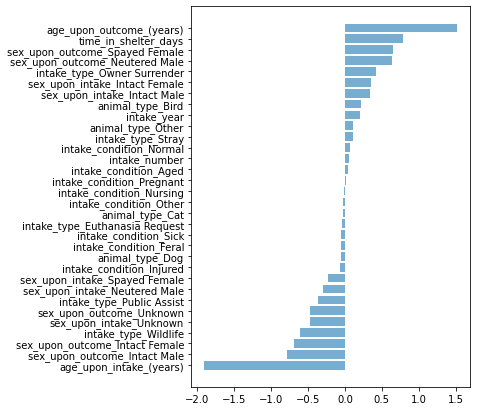

In [34]:
plt.subplots(figsize=(5,7))
plt.barh(features_coef.name, features_coef.value, alpha=0.6)
plt.show()

How can you interpret this information? **Hint**: recall that
$$P(y=1|x,\beta) =\frac{1}{1+\exp(-\beta^Tx)}$$

In [35]:
#Insert your thoughts here#

In [36]:
from sklearn.tree import DecisionTreeClassifier


In [37]:
clf = DecisionTreeClassifier(random_state=33)

In [38]:
clf.fit(train_features_std,train_label)


DecisionTreeClassifier(random_state=33)

In [39]:
predictions = clf.predict(test_features_std)
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [40]:
sum(predictions == test_label)/len(test_label)

0.8093893177681541